In [36]:
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.linear_model import LinearRegression
import os
from sys import platform
from sklearn.linear_model import Ridge, Lasso # regularization
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier # DecisionTreeRegressor
from sklearn.svm import SVC 
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV, train_test_split
from xgboost import XGBRegressor
import joblib
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings("ignore")

In [37]:
data = pd.read_csv("coding-csv/merged_datasets.csv", index_col=[0]).iloc[10:]
data

,ID,date,home_team,home_goals_offense,home_goals_defense,home_offense,home_in_game,home_defense,away_team,away_goals_offense,...,BWA,IWH,IWD,IWA,WHH,WHD,WHA,VCH,VCD,VCA
10,2017-08-25-Real Sociedad-Villarreal,2017-08-25,Real Sociedad,2.7,1.9,1.01,0.69,0.64,Villarreal,0.1,...,3.7,2.2,3.35,3.30,2.10,3.30,3.6,2.15,3.40,3.75
11,2017-08-25-Real Betis-Celta Vigo,2017-08-25,Real Betis,0.0,1.7,0.23,0.58,0.57,Celta Vigo,1.9,...,3.3,2.4,3.30,2.95,2.20,3.25,3.3,2.30,3.50,3.25
12,2017-08-26-Alavés-Barcelona,2017-08-26,Alavés,0.4,1.1,NaN,0.71,0.83,Barcelona,1.7,...,1.3,8.0,5.50,1.33,11.00,5.00,1.3,11.50,5.75,1.30
13,2017-08-26-Girona-Málaga,2017-08-26,Girona,1.6,1.6,0.63,0.55,0.51,Málaga,0.4,...,3.7,2.2,3.35,3.30,2.20,3.30,3.3,2.15,3.30,3.75
14,2017-08-26-Levante-Deportivo La Coruña,2017-08-26,Levante,0.9,0.1,0.67,0.56,0.50,Deportivo La Coruña,0.3,...,3.5,2.2,3.35,3.30,2.25,3.20,3.3,2.20,3.25,3.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2424,2023-12-10-Atlético Madrid-Almería,2023-12-10,Atlético Madrid,1.9,0.9,0.76,0.66,0.59,Almería,1.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2425,2023-12-10-Granada-Athletic Club,2023-12-10,Granada,1.2,1.9,0.70,0.58,0.52,Athletic Club,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2426,2023-12-10-Cádiz-Osasuna,2023-12-10,Cádiz,0.7,1.7,0.58,0.56,0.58,Osasuna,1.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2427,2023-12-10-Barcelona-Girona,2023-12-10,Barcelona,1.4,0.9,0.68,0.64,0.55,Girona,2.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
data.drop(["BWH", "BWD", "BWA", "IWD", "IWH", "IWA", "WHH", "WHD", "WHA", "VCH", "VCD", "VCA"], axis=1, inplace=True)

In [39]:
x = 2419

data.loc[x, "B365H"] = 2.45
data.loc[x, "B365D"] = 3.00
data.loc[x, "B365A"] = 3.00

data.loc[x+1, "B365H"] = 2.00
data.loc[x+1, "B365D"] = 3.10
data.loc[x+1, "B365A"] = 4.20

data.loc[x+2, "B365H"] = 4.20
data.loc[x+2, "B365D"] = 4.00
data.loc[x+2, "B365A"] = 1.80

data.loc[x+3, "B365H"] = 3.30
data.loc[x+3, "B365D"] = 3.40
data.loc[x+3, "B365A"] = 2.20

data.loc[x+4, "B365H"] = 2.80
data.loc[x+4, "B365D"] = 3.00
data.loc[x+4, "B365A"] = 2.63

data.loc[x+5, "B365H"] = 1.22
data.loc[x+5, "B365D"] = 6.00
data.loc[x+5, "B365A"] = 11.00

data.loc[x+6, "B365H"] = 4.75
data.loc[x+6, "B365D"] = 3.75
data.loc[x+6, "B365A"] = 1.70

data.loc[x+7, "B365H"] = 2.88
data.loc[x+7, "B365D"] = 3.10
data.loc[x+7, "B365A"] = 2.45

data.loc[x+8, "B365H"] = 1.50
data.loc[x+8, "B365D"] = 5.00
data.loc[x+8, "B365A"] = 5.00

data.loc[x+9, "B365H"] = 2.38
data.loc[x+9, "B365D"] = 3.10
data.loc[x+9, "B365A"] = 3.20

In [40]:
to_predict = data.iloc[-10:]
to_predict

,ID,date,home_team,home_goals_offense,home_goals_defense,home_offense,home_in_game,home_defense,away_team,away_goals_offense,...,away_standing,home_win_streak,home_lose_streak,away_win_streak,away_lose_streak,home_draw_streak,away_draw_streak,B365H,B365D,B365A
2419,2023-12-08-Getafe-Valencia,2023-12-08,Getafe,1.3,1.1,0.63,0.59,0.56,Valencia,1.0,...,8,1,0,0,0,0,1,2.45,3.00,3.00
2420,2023-12-09-Alavés-Las Palmas,2023-12-09,Alavés,1.3,1.3,0.71,0.59,0.55,Las Palmas,1.0,...,11,1,0,0,1,0,0,2.00,3.10,4.20
2421,2023-12-09-Real Betis-Real Madrid,2023-12-09,Real Betis,1.4,0.8,0.71,0.62,0.64,Real Madrid,2.0,...,1,1,0,2,0,0,0,4.20,4.00,1.80
2422,2023-12-09-Villarreal-Real Sociedad,2023-12-09,Villarreal,1.6,1.9,0.63,0.59,0.59,Real Sociedad,1.6,...,5,1,0,2,0,0,0,3.30,3.40,2.20
2423,2023-12-09-Mallorca-Sevilla,2023-12-09,Mallorca,0.7,1.3,0.55,0.58,0.57,Sevilla,1.2,...,15,0,0,0,1,1,0,2.80,3.00,2.63
2424,2023-12-10-Atlético Madrid-Almería,2023-12-10,Atlético Madrid,1.9,0.9,0.76,0.66,0.59,Almería,1.1,...,20,2,0,0,6,0,0,1.22,6.00,11.00
2425,2023-12-10-Granada-Athletic Club,2023-12-10,Granada,1.2,1.9,0.70,0.58,0.52,Athletic Club,2.0,...,5,0,1,0,0,0,1,4.75,3.75,1.70
2426,2023-12-10-Cádiz-Osasuna,2023-12-10,Cádiz,0.7,1.7,0.58,0.56,0.58,Osasuna,1.3,...,14,0,0,0,1,1,0,2.88,3.10,2.45
2427,2023-12-10-Barcelona-Girona,2023-12-10,Barcelona,1.4,0.9,0.68,0.64,0.55,Girona,2.2,...,1,0,0,0,0,1,1,1.50,5.00,5.00
2428,2023-12-11-Rayo Vallecano-Celta Vigo,2023-12-11,Rayo Vallecano,1.3,1.3,0.60,0.56,0.59,Celta Vigo,1.2,...,18,0,0,0,0,1,1,2.38,3.10,3.20


In [41]:
# to_predict = data[data.columns[-10:]]
predict_odds = data[["B365H", "B365D", "B365A"]].iloc[:-10]
predict_odds

,B365H,B365D,B365A
10,2.05,3.40,3.75
11,2.20,3.40,3.40
12,10.00,5.75,1.29
13,2.15,3.25,3.60
14,2.20,3.10,3.60
...,...,...,...
2414,1.75,3.60,4.75
2415,6.00,4.50,1.50
2416,1.70,3.75,5.25
2417,2.25,3.50,3.10


In [42]:
to_predict

,ID,date,home_team,home_goals_offense,home_goals_defense,home_offense,home_in_game,home_defense,away_team,away_goals_offense,...,away_standing,home_win_streak,home_lose_streak,away_win_streak,away_lose_streak,home_draw_streak,away_draw_streak,B365H,B365D,B365A
2419,2023-12-08-Getafe-Valencia,2023-12-08,Getafe,1.3,1.1,0.63,0.59,0.56,Valencia,1.0,...,8,1,0,0,0,0,1,2.45,3.00,3.00
2420,2023-12-09-Alavés-Las Palmas,2023-12-09,Alavés,1.3,1.3,0.71,0.59,0.55,Las Palmas,1.0,...,11,1,0,0,1,0,0,2.00,3.10,4.20
2421,2023-12-09-Real Betis-Real Madrid,2023-12-09,Real Betis,1.4,0.8,0.71,0.62,0.64,Real Madrid,2.0,...,1,1,0,2,0,0,0,4.20,4.00,1.80
2422,2023-12-09-Villarreal-Real Sociedad,2023-12-09,Villarreal,1.6,1.9,0.63,0.59,0.59,Real Sociedad,1.6,...,5,1,0,2,0,0,0,3.30,3.40,2.20
2423,2023-12-09-Mallorca-Sevilla,2023-12-09,Mallorca,0.7,1.3,0.55,0.58,0.57,Sevilla,1.2,...,15,0,0,0,1,1,0,2.80,3.00,2.63
2424,2023-12-10-Atlético Madrid-Almería,2023-12-10,Atlético Madrid,1.9,0.9,0.76,0.66,0.59,Almería,1.1,...,20,2,0,0,6,0,0,1.22,6.00,11.00
2425,2023-12-10-Granada-Athletic Club,2023-12-10,Granada,1.2,1.9,0.70,0.58,0.52,Athletic Club,2.0,...,5,0,1,0,0,0,1,4.75,3.75,1.70
2426,2023-12-10-Cádiz-Osasuna,2023-12-10,Cádiz,0.7,1.7,0.58,0.56,0.58,Osasuna,1.3,...,14,0,0,0,1,1,0,2.88,3.10,2.45
2427,2023-12-10-Barcelona-Girona,2023-12-10,Barcelona,1.4,0.9,0.68,0.64,0.55,Girona,2.2,...,1,0,0,0,0,1,1,1.50,5.00,5.00
2428,2023-12-11-Rayo Vallecano-Celta Vigo,2023-12-11,Rayo Vallecano,1.3,1.3,0.60,0.56,0.59,Celta Vigo,1.2,...,18,0,0,0,0,1,1,2.38,3.10,3.20


In [43]:
data.dropna(inplace=True)
predict_id = to_predict[["ID"]]
# predict_result = data[["result"]].iloc[-10:]
# to_predict.dropna(inplace=True)

In [44]:
data_odds = data[["B365H", "B365D", "B365A"]]
data_odds

,B365H,B365D,B365A
10,2.05,3.40,3.75
11,2.20,3.40,3.40
13,2.15,3.25,3.60
14,2.20,3.10,3.60
16,1.95,3.25,4.33
...,...,...,...
2424,1.22,6.00,11.00
2425,4.75,3.75,1.70
2426,2.88,3.10,2.45
2427,1.50,5.00,5.00


In [45]:
to_predict

,ID,date,home_team,home_goals_offense,home_goals_defense,home_offense,home_in_game,home_defense,away_team,away_goals_offense,...,away_standing,home_win_streak,home_lose_streak,away_win_streak,away_lose_streak,home_draw_streak,away_draw_streak,B365H,B365D,B365A
2419,2023-12-08-Getafe-Valencia,2023-12-08,Getafe,1.3,1.1,0.63,0.59,0.56,Valencia,1.0,...,8,1,0,0,0,0,1,2.45,3.00,3.00
2420,2023-12-09-Alavés-Las Palmas,2023-12-09,Alavés,1.3,1.3,0.71,0.59,0.55,Las Palmas,1.0,...,11,1,0,0,1,0,0,2.00,3.10,4.20
2421,2023-12-09-Real Betis-Real Madrid,2023-12-09,Real Betis,1.4,0.8,0.71,0.62,0.64,Real Madrid,2.0,...,1,1,0,2,0,0,0,4.20,4.00,1.80
2422,2023-12-09-Villarreal-Real Sociedad,2023-12-09,Villarreal,1.6,1.9,0.63,0.59,0.59,Real Sociedad,1.6,...,5,1,0,2,0,0,0,3.30,3.40,2.20
2423,2023-12-09-Mallorca-Sevilla,2023-12-09,Mallorca,0.7,1.3,0.55,0.58,0.57,Sevilla,1.2,...,15,0,0,0,1,1,0,2.80,3.00,2.63
2424,2023-12-10-Atlético Madrid-Almería,2023-12-10,Atlético Madrid,1.9,0.9,0.76,0.66,0.59,Almería,1.1,...,20,2,0,0,6,0,0,1.22,6.00,11.00
2425,2023-12-10-Granada-Athletic Club,2023-12-10,Granada,1.2,1.9,0.70,0.58,0.52,Athletic Club,2.0,...,5,0,1,0,0,0,1,4.75,3.75,1.70
2426,2023-12-10-Cádiz-Osasuna,2023-12-10,Cádiz,0.7,1.7,0.58,0.56,0.58,Osasuna,1.3,...,14,0,0,0,1,1,0,2.88,3.10,2.45
2427,2023-12-10-Barcelona-Girona,2023-12-10,Barcelona,1.4,0.9,0.68,0.64,0.55,Girona,2.2,...,1,0,0,0,0,1,1,1.50,5.00,5.00
2428,2023-12-11-Rayo Vallecano-Celta Vigo,2023-12-11,Rayo Vallecano,1.3,1.3,0.60,0.56,0.59,Celta Vigo,1.2,...,18,0,0,0,0,1,1,2.38,3.10,3.20


In [46]:
data = data.reset_index(drop=True)
to_predict = to_predict.reset_index(drop=True)

In [47]:
data.drop(["ID", "date", "home_team", "away_team"], axis=1, inplace=True)
predict_id = to_predict[["ID"]]
predicted_result = to_predict[["result"]]
to_predict.drop(["ID", "date", "home_team", "away_team", "result"], axis=1, inplace=True)

In [48]:
to_predict

,home_goals_offense,home_goals_defense,home_offense,home_in_game,home_defense,away_goals_offense,away_goals_defense,away_offense,away_in_game,away_defense,...,away_standing,home_win_streak,home_lose_streak,away_win_streak,away_lose_streak,home_draw_streak,away_draw_streak,B365H,B365D,B365A
0,1.3,1.1,0.63,0.59,0.56,1.0,1.3,0.47,0.56,0.62,...,8,1,0,0,0,0,1,2.45,3.00,3.00
1,1.3,1.3,0.71,0.59,0.55,1.0,1.0,0.64,0.59,0.57,...,11,1,0,0,1,0,0,2.00,3.10,4.20
2,1.4,0.8,0.71,0.62,0.64,2.0,0.8,0.79,0.68,0.61,...,1,1,0,2,0,0,0,4.20,4.00,1.80
3,1.6,1.9,0.63,0.59,0.59,1.6,1.1,0.54,0.55,0.59,...,5,1,0,2,0,0,0,3.30,3.40,2.20
4,0.7,1.3,0.55,0.58,0.57,1.2,1.3,0.52,0.59,0.55,...,15,0,0,0,1,1,0,2.80,3.00,2.63
5,1.9,0.9,0.76,0.66,0.59,1.1,2.4,0.97,0.64,0.53,...,20,2,0,0,6,0,0,1.22,6.00,11.00
6,1.2,1.9,0.70,0.58,0.52,2.0,1.6,0.69,0.60,0.57,...,5,0,1,0,0,0,1,4.75,3.75,1.70
7,0.7,1.7,0.58,0.56,0.58,1.3,1.8,0.58,0.60,0.50,...,14,0,0,0,1,1,0,2.88,3.10,2.45
8,1.4,0.9,0.68,0.64,0.55,2.2,1.4,0.68,0.62,0.55,...,1,0,0,0,0,1,1,1.50,5.00,5.00
9,1.3,1.3,0.60,0.56,0.59,1.2,1.7,0.58,0.62,0.62,...,18,0,0,0,0,1,1,2.38,3.10,3.20


In [49]:
data = pd.concat([data.drop("result", axis=1), data["result"]], axis=1)
results = data[["result"]]

In [50]:
scaler = StandardScaler()
# scaler = MinMaxScaler()

data = pd.DataFrame(scaler.fit_transform(data[data.columns[:-1]]), columns=data.columns[:-1])
to_predict = pd.DataFrame(scaler.fit_transform(to_predict), columns=to_predict.columns)

In [51]:
to_predict

,home_goals_offense,home_goals_defense,home_offense,home_in_game,home_defense,away_goals_offense,away_goals_defense,away_offense,away_in_game,away_defense,...,away_standing,home_win_streak,home_lose_streak,away_win_streak,away_lose_streak,home_draw_streak,away_draw_streak,B365H,B365D,B365A
0,0.057831,-0.544217,-0.392112,-0.223493,-0.455661,-1.065454,-0.320844,-1.258299,-1.255339,1.296224,...,-0.277218,0.603023,-0.333333,-0.5,-0.511992,-0.816497,1.224745,-0.282631,-0.776621,-0.274265
1,0.057831,-0.025915,0.862646,-0.223493,-0.781133,-1.065454,-1.008368,-0.042897,-0.418446,-0.026454,...,0.184812,0.603023,-0.333333,-0.5,0.056888,-0.816497,-0.816497,-0.709422,-0.672377,0.184117
2,0.346989,-1.321669,0.862646,0.734333,2.148117,1.250751,-1.466718,1.029517,2.092231,1.031688,...,-1.355290,0.603023,-0.333333,2.0,-0.511992,-0.816497,-0.816497,1.377113,0.265823,-0.732647
3,0.925304,1.528990,-0.392112,-0.223493,0.520756,0.324269,-0.779194,-0.757839,-1.534303,0.502617,...,-0.739249,0.603023,-0.333333,2.0,-0.511992,-0.816497,-0.816497,0.523531,-0.359643,-0.579853
4,-1.677113,-0.025915,-1.646869,-0.542768,-0.130189,-0.602213,-0.320844,-0.900828,-0.418446,-0.555524,...,0.800853,-0.904534,-0.333333,-0.5,0.056888,1.224745,-0.816497,0.049318,-0.776621,-0.415600
5,1.792776,-1.062519,1.646869,2.011435,0.520756,-0.833834,2.200076,2.316414,0.976375,-1.084595,...,1.570905,2.110579,-0.333333,-0.5,2.901289,-0.816497,-0.816497,-1.449194,2.350713,2.781616
6,-0.231326,1.528990,0.705801,-0.542768,-1.757550,1.250751,0.366679,0.314575,-0.139482,-0.026454,...,-0.739249,-0.904534,3.000000,-0.5,-0.511992,-0.816497,1.224745,1.898747,0.005212,-0.770846
7,-1.677113,1.010688,-1.176335,-1.181319,0.195283,-0.370593,0.825029,-0.471862,-0.139482,-1.878202,...,0.646843,-0.904534,-0.333333,-0.5,0.056888,1.224745,-0.816497,0.125192,-0.672377,-0.484357
8,0.346989,-1.062519,0.392112,1.372884,-0.781133,1.713992,-0.091670,0.243080,0.418446,-0.555524,...,-1.355290,-0.904534,-0.333333,-0.5,-0.511992,1.224745,1.224745,-1.183635,1.308268,0.489705
9,0.057831,-0.025915,-0.862646,-1.181319,0.520756,-0.602213,0.595854,-0.471862,0.418446,1.296224,...,1.262884,-0.904534,-0.333333,-0.5,-0.511992,1.224745,1.224745,-0.349020,-0.672377,-0.197868


In [52]:
# newdata = data.iloc[[-1]]
# data = data.iloc[:-1]

In [53]:
data["result"] = results

In [54]:
data

,home_goals_offense,home_goals_defense,home_offense,home_in_game,home_defense,away_goals_offense,away_goals_defense,away_offense,away_in_game,away_defense,...,home_win_streak,home_lose_streak,away_win_streak,away_lose_streak,home_draw_streak,away_draw_streak,B365H,B365D,B365A,result
0,3.432261,1.435909,3.626829,2.580227,1.562783,-2.788940,-0.400661,-2.311148,1.439119,3.827203,...,0.371720,-0.650181,-0.603508,0.480528,-0.508070,-0.517873,-0.364808,-0.387293,-0.218620,1.0
1,-3.021319,0.961963,-3.800426,-0.543119,0.164648,1.478803,3.452728,4.296686,1.439119,-4.827651,...,-0.488128,0.316261,-0.603508,0.480528,-0.508070,-0.517873,-0.272014,-0.387293,-0.319733,1.0
2,0.803025,0.724991,0.008423,-1.394941,-1.033754,-2.077650,-0.400661,1.852692,-1.129111,0.581633,...,-0.488128,-0.650181,-0.603508,0.480528,0.880615,-0.517873,-0.302946,-0.510216,-0.261954,1.0
3,-0.870125,-2.829599,0.389308,-1.111000,-1.233488,-2.314747,3.452728,-0.229228,-3.982701,-2.231195,...,0.371720,-0.650181,-0.603508,0.480528,-0.508070,-0.517873,-0.272014,-0.633138,-0.261954,0.5
4,0.324982,0.251045,3.150723,2.580227,-0.634287,-0.655069,-2.327356,-5.750842,2.009837,-5.693137,...,-0.488128,-0.650181,0.243866,-0.523038,0.880615,-0.517873,-0.426671,-0.510216,-0.051060,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2403,1.520089,-0.933818,1.246299,1.728406,0.564115,-0.417972,2.730218,3.029430,1.153760,-0.932967,...,1.231568,-0.650181,-0.603508,5.498355,-0.508070,-0.517873,-0.878270,1.743358,1.875880,0.5
2404,-0.153061,1.435909,0.674971,-0.543119,-0.834020,1.715900,0.803523,0.494918,0.012324,-0.067481,...,-0.488128,0.316261,-0.603508,-0.523038,-0.508070,0.875465,1.305488,-0.100475,-0.810857,0.5
2405,-1.348168,0.961963,-0.467683,-1.111000,0.364381,0.056222,1.285197,-0.500783,0.012324,-1.582081,...,-0.488128,-0.650181,-0.603508,0.480528,0.880615,-0.517873,0.148653,-0.633138,-0.594185,0.5
2406,0.324982,-0.933818,0.484529,1.160525,-0.234820,2.190094,0.321849,0.404400,0.583042,-0.500224,...,-0.488128,-0.650181,-0.603508,-0.523038,0.880615,0.875465,-0.705054,0.923877,0.142501,0.5


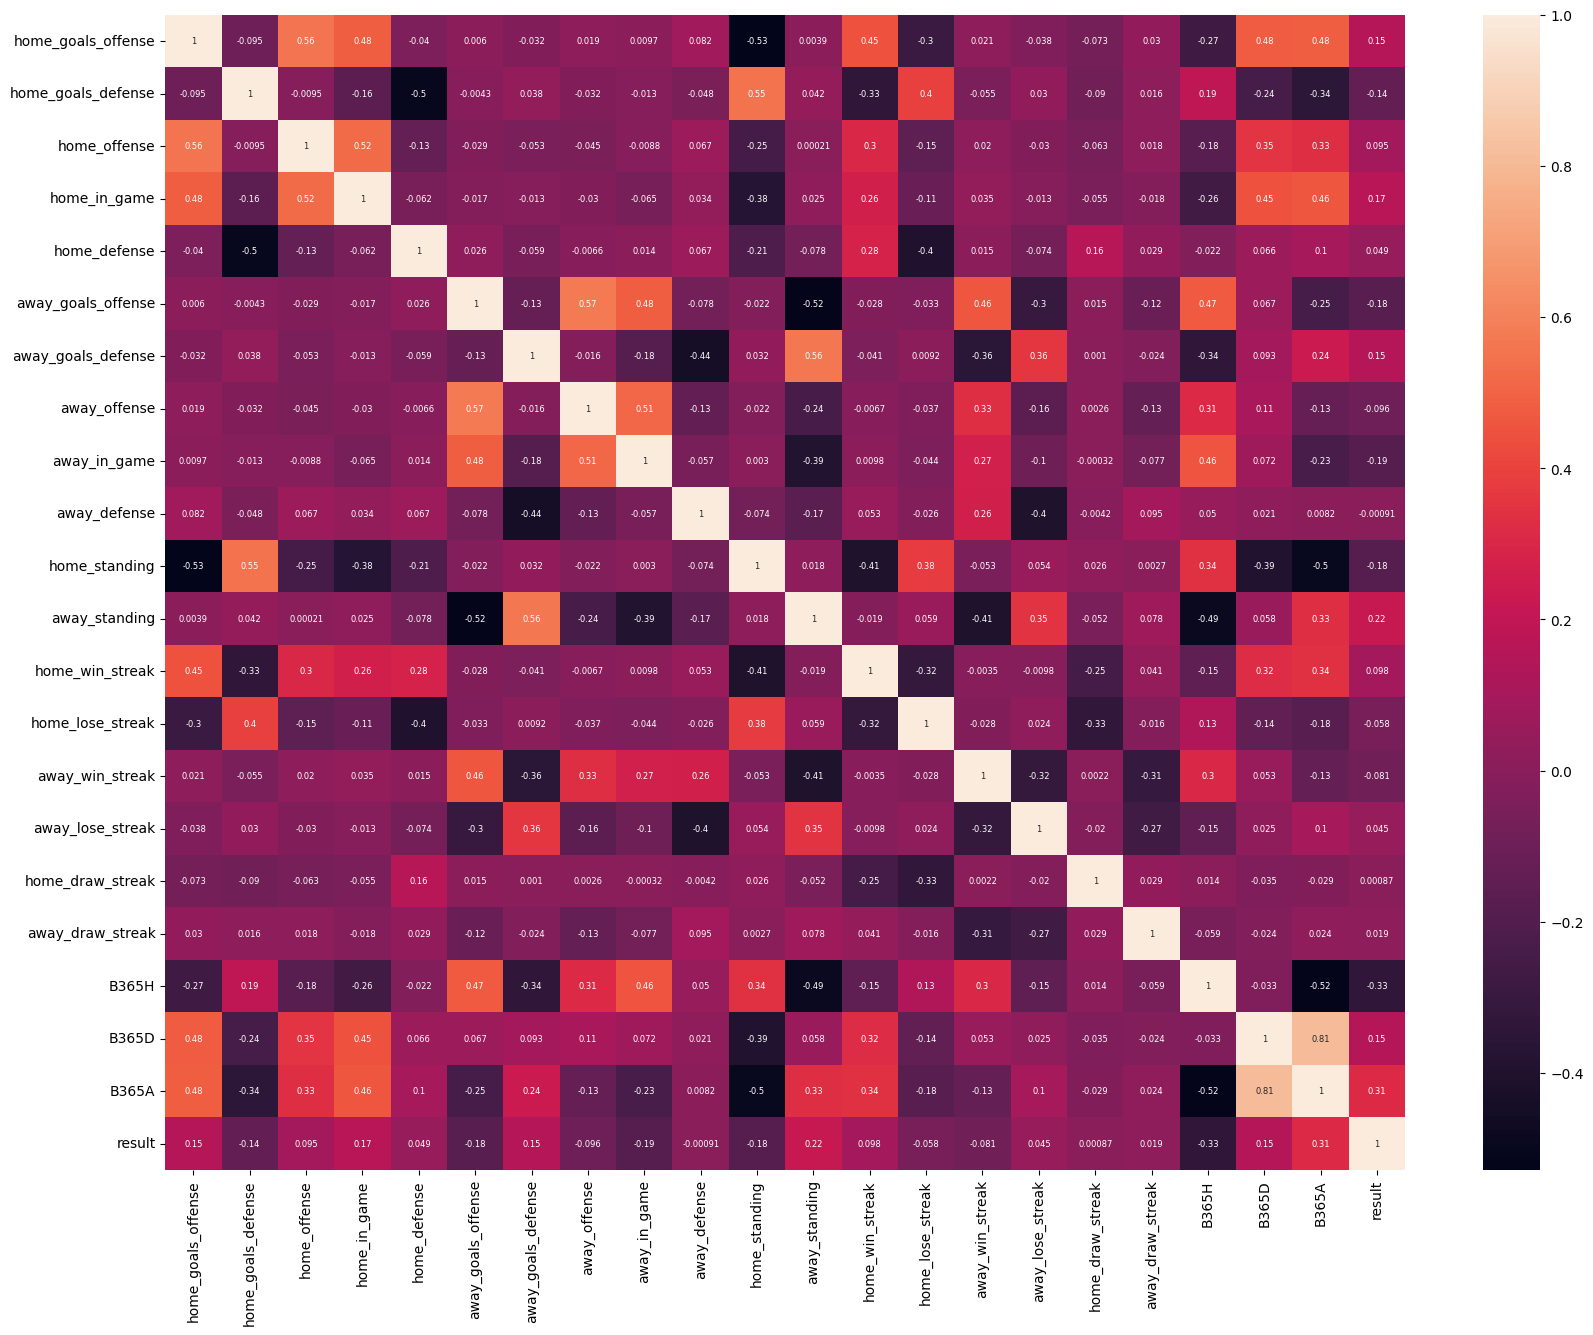

In [55]:
x = data.corr()

plt.subplots(figsize=(20,15))
sns.heatmap(x, annot=True, annot_kws={'size': 6});

In [56]:
to_predict

,home_goals_offense,home_goals_defense,home_offense,home_in_game,home_defense,away_goals_offense,away_goals_defense,away_offense,away_in_game,away_defense,...,away_standing,home_win_streak,home_lose_streak,away_win_streak,away_lose_streak,home_draw_streak,away_draw_streak,B365H,B365D,B365A
0,0.057831,-0.544217,-0.392112,-0.223493,-0.455661,-1.065454,-0.320844,-1.258299,-1.255339,1.296224,...,-0.277218,0.603023,-0.333333,-0.5,-0.511992,-0.816497,1.224745,-0.282631,-0.776621,-0.274265
1,0.057831,-0.025915,0.862646,-0.223493,-0.781133,-1.065454,-1.008368,-0.042897,-0.418446,-0.026454,...,0.184812,0.603023,-0.333333,-0.5,0.056888,-0.816497,-0.816497,-0.709422,-0.672377,0.184117
2,0.346989,-1.321669,0.862646,0.734333,2.148117,1.250751,-1.466718,1.029517,2.092231,1.031688,...,-1.355290,0.603023,-0.333333,2.0,-0.511992,-0.816497,-0.816497,1.377113,0.265823,-0.732647
3,0.925304,1.528990,-0.392112,-0.223493,0.520756,0.324269,-0.779194,-0.757839,-1.534303,0.502617,...,-0.739249,0.603023,-0.333333,2.0,-0.511992,-0.816497,-0.816497,0.523531,-0.359643,-0.579853
4,-1.677113,-0.025915,-1.646869,-0.542768,-0.130189,-0.602213,-0.320844,-0.900828,-0.418446,-0.555524,...,0.800853,-0.904534,-0.333333,-0.5,0.056888,1.224745,-0.816497,0.049318,-0.776621,-0.415600
5,1.792776,-1.062519,1.646869,2.011435,0.520756,-0.833834,2.200076,2.316414,0.976375,-1.084595,...,1.570905,2.110579,-0.333333,-0.5,2.901289,-0.816497,-0.816497,-1.449194,2.350713,2.781616
6,-0.231326,1.528990,0.705801,-0.542768,-1.757550,1.250751,0.366679,0.314575,-0.139482,-0.026454,...,-0.739249,-0.904534,3.000000,-0.5,-0.511992,-0.816497,1.224745,1.898747,0.005212,-0.770846
7,-1.677113,1.010688,-1.176335,-1.181319,0.195283,-0.370593,0.825029,-0.471862,-0.139482,-1.878202,...,0.646843,-0.904534,-0.333333,-0.5,0.056888,1.224745,-0.816497,0.125192,-0.672377,-0.484357
8,0.346989,-1.062519,0.392112,1.372884,-0.781133,1.713992,-0.091670,0.243080,0.418446,-0.555524,...,-1.355290,-0.904534,-0.333333,-0.5,-0.511992,1.224745,1.224745,-1.183635,1.308268,0.489705
9,0.057831,-0.025915,-0.862646,-1.181319,0.520756,-0.602213,0.595854,-0.471862,0.418446,1.296224,...,1.262884,-0.904534,-0.333333,-0.5,-0.511992,1.224745,1.224745,-0.349020,-0.672377,-0.197868


In [57]:
numbers = []

# for i in range(20):
# to_predict = data.iloc[-10:]
# to_predict = to_predict.iloc[:,:-1]
data = data.iloc[:-10]
X = data.iloc[:,:-1]
y = data['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

param_grid = {
'n_estimators': [10, 50, 100]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)

grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)

model_filename = 'mymodel2.pkl'
joblib.dump(grid_search, model_filename)

loaded_model = joblib.load('mymodel2.pkl')

predicted_data = loaded_model.predict(to_predict)
# newdata_pred = loaded_model.predict(newdata)

numbers.append(predicted_data)

r2 = r2_score(y_pred, y_test)
mse = mean_absolute_error(y_test, y_pred)

print(f"{round(r2, 2)}, {round(mse, 2)}")

-3.37, 0.33


In [58]:
X

,home_goals_offense,home_goals_defense,home_offense,home_in_game,home_defense,away_goals_offense,away_goals_defense,away_offense,away_in_game,away_defense,...,away_standing,home_win_streak,home_lose_streak,away_win_streak,away_lose_streak,home_draw_streak,away_draw_streak,B365H,B365D,B365A
0,3.432261,1.435909,3.626829,2.580227,1.562783,-2.788940,-0.400661,-2.311148,1.439119,3.827203,...,0.714731,0.371720,-0.650181,-0.603508,0.480528,-0.508070,-0.517873,-0.364808,-0.387293,-0.218620
1,-3.021319,0.961963,-3.800426,-0.543119,0.164648,1.478803,3.452728,4.296686,1.439119,-4.827651,...,0.714731,-0.488128,0.316261,-0.603508,0.480528,-0.508070,-0.517873,-0.272014,-0.387293,-0.319733
2,0.803025,0.724991,0.008423,-1.394941,-1.033754,-2.077650,-0.400661,1.852692,-1.129111,0.581633,...,0.714731,-0.488128,-0.650181,-0.603508,0.480528,0.880615,-0.517873,-0.302946,-0.510216,-0.261954
3,-0.870125,-2.829599,0.389308,-1.111000,-1.233488,-2.314747,3.452728,-0.229228,-3.982701,-2.231195,...,0.714731,0.371720,-0.650181,-0.603508,0.480528,-0.508070,-0.517873,-0.272014,-0.633138,-0.261954
4,0.324982,0.251045,3.150723,2.580227,-0.634287,-0.655069,-2.327356,-5.750842,2.009837,-5.693137,...,-1.562515,-0.488128,-0.650181,0.243866,-0.523038,0.880615,-0.517873,-0.426671,-0.510216,-0.051060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2393,1.042046,0.014073,-0.372462,-1.394941,0.564115,0.293319,0.081012,-0.953374,-0.273034,-0.283853,...,0.539558,0.371720,-0.650181,-0.603508,-0.523038,-0.508070,6.448816,-0.550397,-0.223397,0.070277
2394,-0.870125,0.724991,-0.753347,-1.111000,0.364381,1.478803,-1.123172,2.033729,2.295196,-0.067481,...,-1.387342,-0.488128,0.316261,0.243866,-0.523038,-0.508070,-0.517873,2.078774,0.514136,-0.868637
2395,0.324982,-0.696845,0.674971,0.592643,0.763848,-0.180875,-0.641498,0.313882,-0.273034,0.148890,...,-0.336306,-0.488128,-0.650181,-0.603508,-0.523038,0.880615,0.875465,-0.581328,-0.100475,0.214725
2396,2.237153,-0.222900,0.770192,0.592643,-0.234820,1.952997,0.562686,1.762174,0.012324,-1.582081,...,-0.861824,3.811111,-0.650181,1.091240,-0.523038,-0.508070,-0.517873,-0.241083,-0.305345,-0.406402


In [59]:
import h2o
h2o.init()

model_path = "StackedEnsemble_AllModels_1_AutoML_1_20231206_91206"  # Provide the path to your H2O model
loaded_model = h2o.load_model(model_path)

h2o_df = h2o.H2OFrame(to_predict)

Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,5 hours 3 mins
H2O_cluster_timezone:,Europe/Paris
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,7 months and 8 days
H2O_cluster_name:,H2O_from_python_marcf_27o2t1
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.193 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [60]:
predictions = loaded_model.predict(h2o_df)
predictions_df = predictions.as_data_frame()

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [61]:
predictions_df

,predict
0,0.639394
1,0.671245
2,0.337877
3,0.442232
4,0.541256
5,0.882283
6,0.337856
7,0.528286
8,0.759880
9,0.531688


In [62]:
h2o.__version__

'3.40.0.4'

In [63]:
import h2o
h2o.init()

model_path = "StackedEnsemble_AllModels_1_AutoML_1_20231206_91206"  # Provide the path to your H2O model
loaded_model = h2o.load_model(model_path)

h2o_df = h2o.H2OFrame(X)

Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,5 hours 4 mins
H2O_cluster_timezone:,Europe/Paris
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,7 months and 8 days
H2O_cluster_name:,H2O_from_python_marcf_27o2t1
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.187 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [64]:
predictions = loaded_model.predict(h2o_df)
predictions_df = predictions.as_data_frame()

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [65]:
mean_absolute_error(y, predictions_df), r2_score(y, predictions_df)

(0.2960969479762158, 0.3215888758131473)

In [66]:
predictions_df

,predict
0,0.668971
1,0.629421
2,0.584610
3,0.582255
4,0.537950
...,...
2393,0.730158
2394,0.207855
2395,0.714129
2396,0.560042


In [67]:
thisseason = data.iloc[-149:]
thisseason

,home_goals_offense,home_goals_defense,home_offense,home_in_game,home_defense,away_goals_offense,away_goals_defense,away_offense,away_in_game,away_defense,...,home_win_streak,home_lose_streak,away_win_streak,away_lose_streak,home_draw_streak,away_draw_streak,B365H,B365D,B365A,result
2249,1.520089,0.014073,-0.753347,0.308703,-0.434553,2.427191,-0.159824,1.128546,1.153760,-0.067481,...,-0.488128,0.316261,0.243866,-0.523038,-0.508070,-0.517873,0.037300,-0.305345,-0.579740,0.5
2250,0.085960,-0.933818,-1.039011,-1.394941,0.164648,0.056222,-0.641498,-0.953374,-0.273034,-0.716595,...,-0.488128,0.316261,-0.603508,0.480528,-0.508070,-0.517873,-0.562769,0.022447,0.026942,1.0
2251,0.324982,-0.222900,2.103289,2.580227,0.164648,-0.655069,0.562686,0.132845,0.012324,0.148890,...,1.231568,-0.650181,-0.603508,1.484093,-0.508070,-0.517873,-0.451416,-0.100475,-0.218620,0.5
2252,-0.392083,0.488018,-0.943789,-0.259178,-0.834020,0.530416,0.562686,0.404400,0.583042,-1.365709,...,-0.488128,0.316261,-0.603508,0.480528,-0.508070,-0.517873,-0.364808,-0.223397,-0.319733,1.0
2253,-1.109147,0.961963,-1.134232,-0.259178,-1.832688,0.056222,0.803523,-0.500783,-1.129111,0.365261,...,-0.488128,0.316261,0.243866,-0.523038,-0.508070,-0.517873,0.222889,-0.469242,-0.614408,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2393,1.042046,0.014073,-0.372462,-1.394941,0.564115,0.293319,0.081012,-0.953374,-0.273034,-0.283853,...,0.371720,-0.650181,-0.603508,-0.523038,-0.508070,6.448816,-0.550397,-0.223397,0.070277,1.0
2394,-0.870125,0.724991,-0.753347,-1.111000,0.364381,1.478803,-1.123172,2.033729,2.295196,-0.067481,...,-0.488128,0.316261,0.243866,-0.523038,-0.508070,-0.517873,2.078774,0.514136,-0.868637,0.0
2395,0.324982,-0.696845,0.674971,0.592643,0.763848,-0.180875,-0.641498,0.313882,-0.273034,0.148890,...,-0.488128,-0.650181,-0.603508,-0.523038,0.880615,0.875465,-0.581328,-0.100475,0.214725,1.0
2396,2.237153,-0.222900,0.770192,0.592643,-0.234820,1.952997,0.562686,1.762174,0.012324,-1.582081,...,3.811111,-0.650181,1.091240,-0.523038,-0.508070,-0.517873,-0.241083,-0.305345,-0.406402,0.5


In [95]:
h2o_df = h2o.H2OFrame(thisseason)
predictions = loaded_model.predict(h2o_df)
predictions_df = predictions.as_data_frame()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [98]:
r2_score(y.iloc[-149:], predictions_df), mean_absolute_error(y.iloc[-149:], predictions_df)

(0.42892715320179775, 0.26001678890522956)

In [68]:
X

,home_goals_offense,home_goals_defense,home_offense,home_in_game,home_defense,away_goals_offense,away_goals_defense,away_offense,away_in_game,away_defense,...,away_standing,home_win_streak,home_lose_streak,away_win_streak,away_lose_streak,home_draw_streak,away_draw_streak,B365H,B365D,B365A
0,3.432261,1.435909,3.626829,2.580227,1.562783,-2.788940,-0.400661,-2.311148,1.439119,3.827203,...,0.714731,0.371720,-0.650181,-0.603508,0.480528,-0.508070,-0.517873,-0.364808,-0.387293,-0.218620
1,-3.021319,0.961963,-3.800426,-0.543119,0.164648,1.478803,3.452728,4.296686,1.439119,-4.827651,...,0.714731,-0.488128,0.316261,-0.603508,0.480528,-0.508070,-0.517873,-0.272014,-0.387293,-0.319733
2,0.803025,0.724991,0.008423,-1.394941,-1.033754,-2.077650,-0.400661,1.852692,-1.129111,0.581633,...,0.714731,-0.488128,-0.650181,-0.603508,0.480528,0.880615,-0.517873,-0.302946,-0.510216,-0.261954
3,-0.870125,-2.829599,0.389308,-1.111000,-1.233488,-2.314747,3.452728,-0.229228,-3.982701,-2.231195,...,0.714731,0.371720,-0.650181,-0.603508,0.480528,-0.508070,-0.517873,-0.272014,-0.633138,-0.261954
4,0.324982,0.251045,3.150723,2.580227,-0.634287,-0.655069,-2.327356,-5.750842,2.009837,-5.693137,...,-1.562515,-0.488128,-0.650181,0.243866,-0.523038,0.880615,-0.517873,-0.426671,-0.510216,-0.051060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2393,1.042046,0.014073,-0.372462,-1.394941,0.564115,0.293319,0.081012,-0.953374,-0.273034,-0.283853,...,0.539558,0.371720,-0.650181,-0.603508,-0.523038,-0.508070,6.448816,-0.550397,-0.223397,0.070277
2394,-0.870125,0.724991,-0.753347,-1.111000,0.364381,1.478803,-1.123172,2.033729,2.295196,-0.067481,...,-1.387342,-0.488128,0.316261,0.243866,-0.523038,-0.508070,-0.517873,2.078774,0.514136,-0.868637
2395,0.324982,-0.696845,0.674971,0.592643,0.763848,-0.180875,-0.641498,0.313882,-0.273034,0.148890,...,-0.336306,-0.488128,-0.650181,-0.603508,-0.523038,0.880615,0.875465,-0.581328,-0.100475,0.214725
2396,2.237153,-0.222900,0.770192,0.592643,-0.234820,1.952997,0.562686,1.762174,0.012324,-1.582081,...,-0.861824,3.811111,-0.650181,1.091240,-0.523038,-0.508070,-0.517873,-0.241083,-0.305345,-0.406402


In [69]:
array_stack = np.stack(numbers)

# Calculate the mean along axis 0 (which corresponds to the instances you want to average)
result_array = np.mean(array_stack, axis=0)

# Display the result
print(result_array)

[0.72  0.565 0.245 0.44  0.595 0.75  0.305 0.58  0.77  0.59 ]


In [70]:
mean_absolute_error(y_test, y_pred)

0.33054166666666673

In [71]:
# X = data.iloc[:,:-1]
# y = data['result']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [72]:
# from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor()

In [73]:
# param_grid = {
#     'n_estimators': [10, 50, 100]
# }

In [74]:
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)

In [75]:
# grid_search.fit(X_train, y_train)

In [76]:
# y_pred = grid_search.predict(X_test)

In [77]:
# r2 = r2_score(y_pred, y_test)
# mse = mean_squared_error(y_test, y_pred)

In [78]:
# r2, mse

In [79]:
# model_filename = 'mymodel2.pkl'
# joblib.dump(grid_search, model_filename)

In [80]:
# loaded_model = joblib.load('mymodel2.pkl')

In [81]:
# predicted_data = loaded_model.predict(to_predict)
# # newdata_pred = loaded_model.predict(newdata)

In [82]:
# predicted_data

In [83]:
# newdata_pred

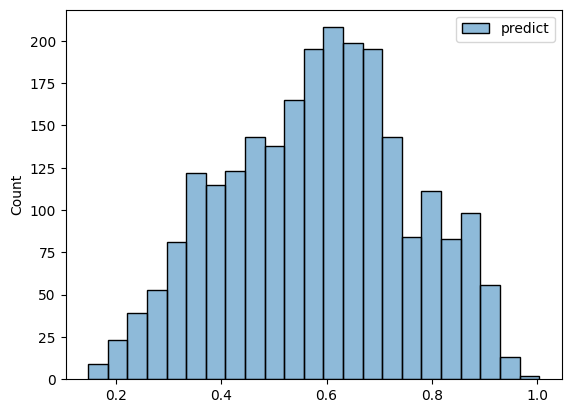

In [84]:
sns.histplot(predictions_df);

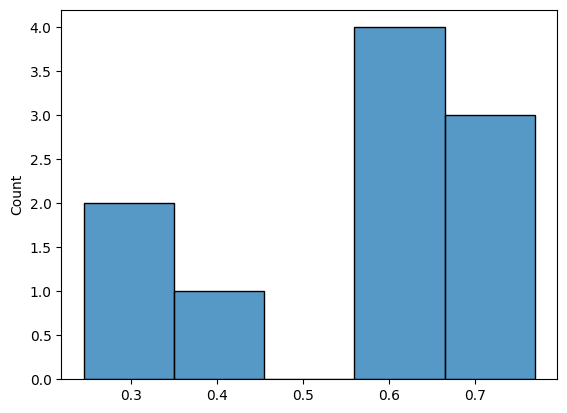

In [85]:
sns.histplot(result_array);

In [86]:
theresults = X
theresults["predicted"] = predictions_df
theresults["result"] = y
theresults

,home_goals_offense,home_goals_defense,home_offense,home_in_game,home_defense,away_goals_offense,away_goals_defense,away_offense,away_in_game,away_defense,...,home_lose_streak,away_win_streak,away_lose_streak,home_draw_streak,away_draw_streak,B365H,B365D,B365A,predicted,result
0,3.432261,1.435909,3.626829,2.580227,1.562783,-2.788940,-0.400661,-2.311148,1.439119,3.827203,...,-0.650181,-0.603508,0.480528,-0.508070,-0.517873,-0.364808,-0.387293,-0.218620,0.668971,1.0
1,-3.021319,0.961963,-3.800426,-0.543119,0.164648,1.478803,3.452728,4.296686,1.439119,-4.827651,...,0.316261,-0.603508,0.480528,-0.508070,-0.517873,-0.272014,-0.387293,-0.319733,0.629421,1.0
2,0.803025,0.724991,0.008423,-1.394941,-1.033754,-2.077650,-0.400661,1.852692,-1.129111,0.581633,...,-0.650181,-0.603508,0.480528,0.880615,-0.517873,-0.302946,-0.510216,-0.261954,0.584610,1.0
3,-0.870125,-2.829599,0.389308,-1.111000,-1.233488,-2.314747,3.452728,-0.229228,-3.982701,-2.231195,...,-0.650181,-0.603508,0.480528,-0.508070,-0.517873,-0.272014,-0.633138,-0.261954,0.582255,0.5
4,0.324982,0.251045,3.150723,2.580227,-0.634287,-0.655069,-2.327356,-5.750842,2.009837,-5.693137,...,-0.650181,0.243866,-0.523038,0.880615,-0.517873,-0.426671,-0.510216,-0.051060,0.537950,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2393,1.042046,0.014073,-0.372462,-1.394941,0.564115,0.293319,0.081012,-0.953374,-0.273034,-0.283853,...,-0.650181,-0.603508,-0.523038,-0.508070,6.448816,-0.550397,-0.223397,0.070277,0.730158,1.0
2394,-0.870125,0.724991,-0.753347,-1.111000,0.364381,1.478803,-1.123172,2.033729,2.295196,-0.067481,...,0.316261,0.243866,-0.523038,-0.508070,-0.517873,2.078774,0.514136,-0.868637,0.207855,0.0
2395,0.324982,-0.696845,0.674971,0.592643,0.763848,-0.180875,-0.641498,0.313882,-0.273034,0.148890,...,-0.650181,-0.603508,-0.523038,0.880615,0.875465,-0.581328,-0.100475,0.214725,0.714129,1.0
2396,2.237153,-0.222900,0.770192,0.592643,-0.234820,1.952997,0.562686,1.762174,0.012324,-1.582081,...,-0.650181,1.091240,-0.523038,-0.508070,-0.517873,-0.241083,-0.305345,-0.406402,0.560042,0.5


In [87]:
margin = 0.7

wins = theresults[theresults["predicted"] > margin]

losses = theresults[theresults["predicted"] < (1 - margin)]


print(f"Nº wins: {len(wins[wins['result']==1]) + len(losses[losses['result']==0])}")
print(f"Nº: {len(wins) + len(losses)}")
print(f"Percentage: {round(((len(wins[wins['result']==1]) + len(losses[losses['result']==0])) / (len(wins) + len(losses)))*100, 2)}%")
print("----------")
print(f"Number of games: {(len(theresults))}")
print(f"Percentage betted: {round(((len(wins) + len(losses)) / len(theresults))*100,2)}%")

Nº wins: 619
Nº: 746
Percentage: 82.98%
----------
Number of games: 2398
Percentage betted: 31.11%


In [88]:
data_odds = data_odds.iloc[:-10].reset_index(drop=True)

In [89]:
to_add = theresults[theresults.columns[-2:]].reset_index(drop=True)

In [90]:
bet = 10
theresults = pd.concat([to_add, data_odds], axis=1)
theresults.tail(20)

,predicted,result,B365H,B365D,B365A
2378,0.770274,1.0,1.67,3.80,5.00
2379,0.368502,0.0,2.88,3.50,2.40
2380,0.345925,0.0,4.75,3.80,1.73
2381,0.644275,0.5,1.95,3.40,4.00
2382,0.573325,0.5,2.50,3.10,3.00
2383,0.882403,1.0,1.33,5.50,8.50
2384,0.860554,1.0,1.25,6.00,11.00
2385,0.544844,0.5,2.05,3.50,3.60
2386,0.854064,1.0,1.36,5.50,7.50
2387,0.706777,1.0,1.70,3.60,5.00


In [91]:
theresults['profit'] = np.where((theresults['predicted'] > margin) & (theresults['result'] == 1), (theresults['B365H'] * bet) - bet, np.where((theresults['predicted'] > margin) & (theresults['result'] != 1), -bet, np.where((theresults['predicted'] < ( 1 - margin)) & (theresults['result'] == 0), (theresults['B365A'] * bet) - bet, np.where((theresults['predicted'] < ( 1 - margin)) & (theresults['result'] != 0), -bet, 0))))

In [92]:
theresults

,predicted,result,B365H,B365D,B365A,profit
0,0.668971,1.0,2.05,3.40,3.75,0.0
1,0.629421,1.0,2.20,3.40,3.40,0.0
2,0.584610,1.0,2.15,3.25,3.60,0.0
3,0.582255,0.5,2.20,3.10,3.60,0.0
4,0.537950,0.0,1.95,3.25,4.33,0.0
...,...,...,...,...,...,...
2393,0.730158,1.0,1.75,3.60,4.75,7.5
2394,0.207855,0.0,6.00,4.50,1.50,5.0
2395,0.714129,1.0,1.70,3.75,5.25,7.0
2396,0.560042,0.5,2.25,3.50,3.10,0.0


In [93]:
theresults["profit"].sum()

1832.8

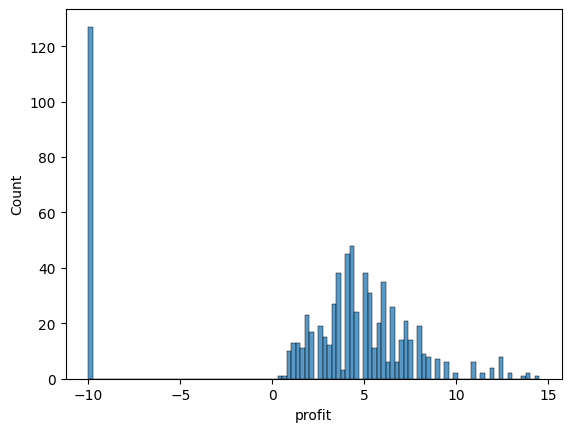

In [94]:
sns.histplot(theresults[theresults["profit"]!=0]["profit"], bins=100);